In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import warnings

warnings.filterwarnings('ignore')

# Cria a pasta padrão para salvar as imagens
output_dir = 'main_files'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Ambiente configurado! Imagens serão salvas em: {output_dir}/")

Ambiente configurado! Imagens serão salvas em: main_files/


Dataset Iris carregado com sucesso!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


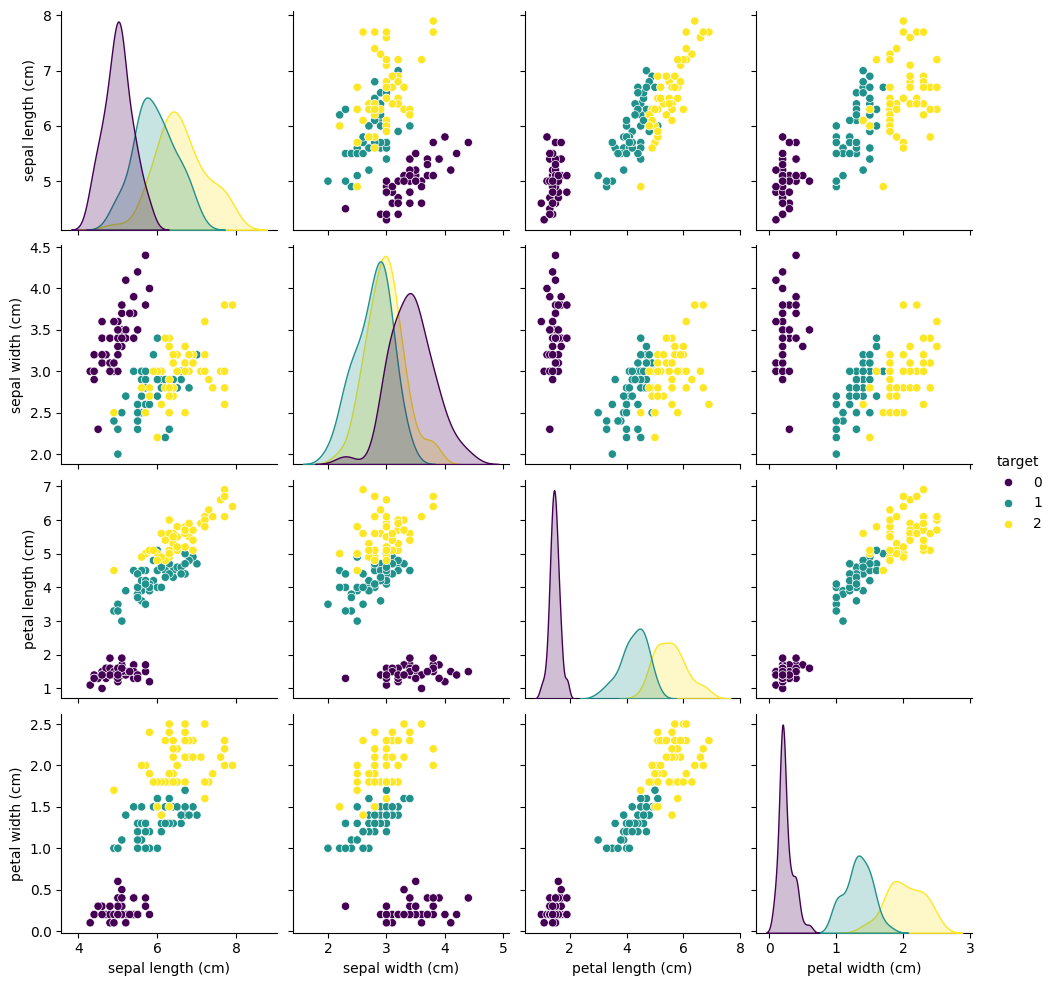

In [2]:
# Carregar o Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Dataset Iris carregado com sucesso!")
display(df.head())

# Visualização de Pares (Pairplot)
sns.pairplot(df, hue='target', palette='viridis')
plt.savefig(f'{output_dir}/1_pairplot.png', dpi=300)
plt.show()

Acurácia KNN: 1.0000


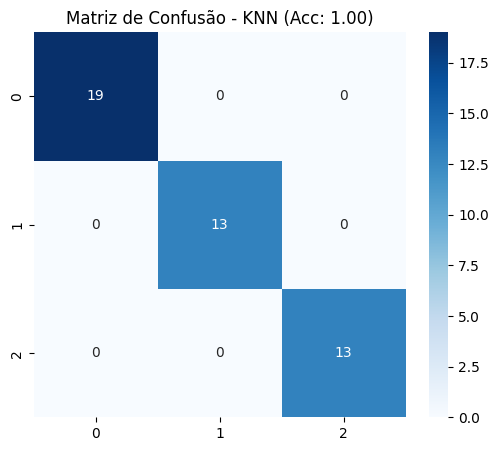

In [3]:
# Divisão e Escalonamento
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Avaliação KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia KNN: {acc_knn:.4f}")

# Matriz de Confusão KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão - KNN (Acc: {acc_knn:.2f})')
plt.savefig(f'{output_dir}/2_confusao_knn.png', dpi=300)
plt.show()

Acurácia K-Means (Ajustada): 0.8933


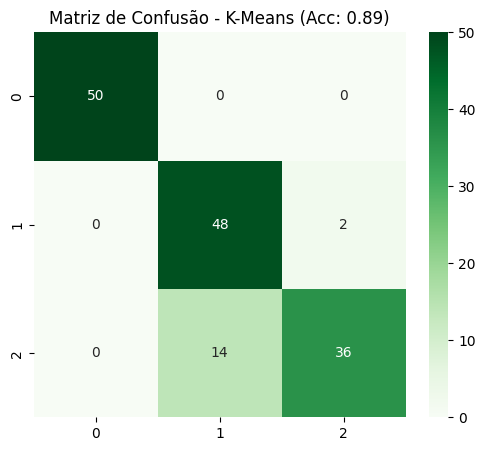

In [4]:
# K-Means (Clusterização)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X) # K-Means usa dados sem rótulos
clusters = kmeans.labels_

# Mapeamento dos Clusters para Classes Reais (Para poder comparar)
# Isso é necessário porque o K-Means pode chamar a classe 0 de 1, etc.
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

# Avaliação K-Means
acc_kmeans = accuracy_score(y, labels)
print(f"Acurácia K-Means (Ajustada): {acc_kmeans:.4f}")

# Matriz de Confusão K-Means
cm_kmeans = confusion_matrix(y, labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusão - K-Means (Acc: {acc_kmeans:.2f})')
plt.savefig(f'{output_dir}/3_confusao_kmeans.png', dpi=300)
plt.show()